In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
path = "C:/Users/Easy Data/Dropbox/PC/Downloads/usuarios_win_mac_lin.csv"
df = pd.read_csv(path)


In [3]:
print("Forma inicial del DataFrame:", df.shape)
print(df.head())
print("Valores únicos en clase:", df["clase"].unique())

Forma inicial del DataFrame: (170, 5)
   duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2
Valores únicos en clase: [2 1 0]


In [4]:
df.info()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [5]:
df = df[df["clase"].isin([0, 1, 2])]

In [6]:
if df.empty:
    raise ValueError("El DataFrame quedó vacío después de limpiar y filtrar los datos.")

# 4. Estadísticas básicas
print("Duplicados:", df.duplicated().sum())
print("Distribución por clase:")
print(df["clase"].value_counts())


Duplicados: 0
Distribución por clase:
clase
0    83
1    38
2    33
Name: count, dtype: int64


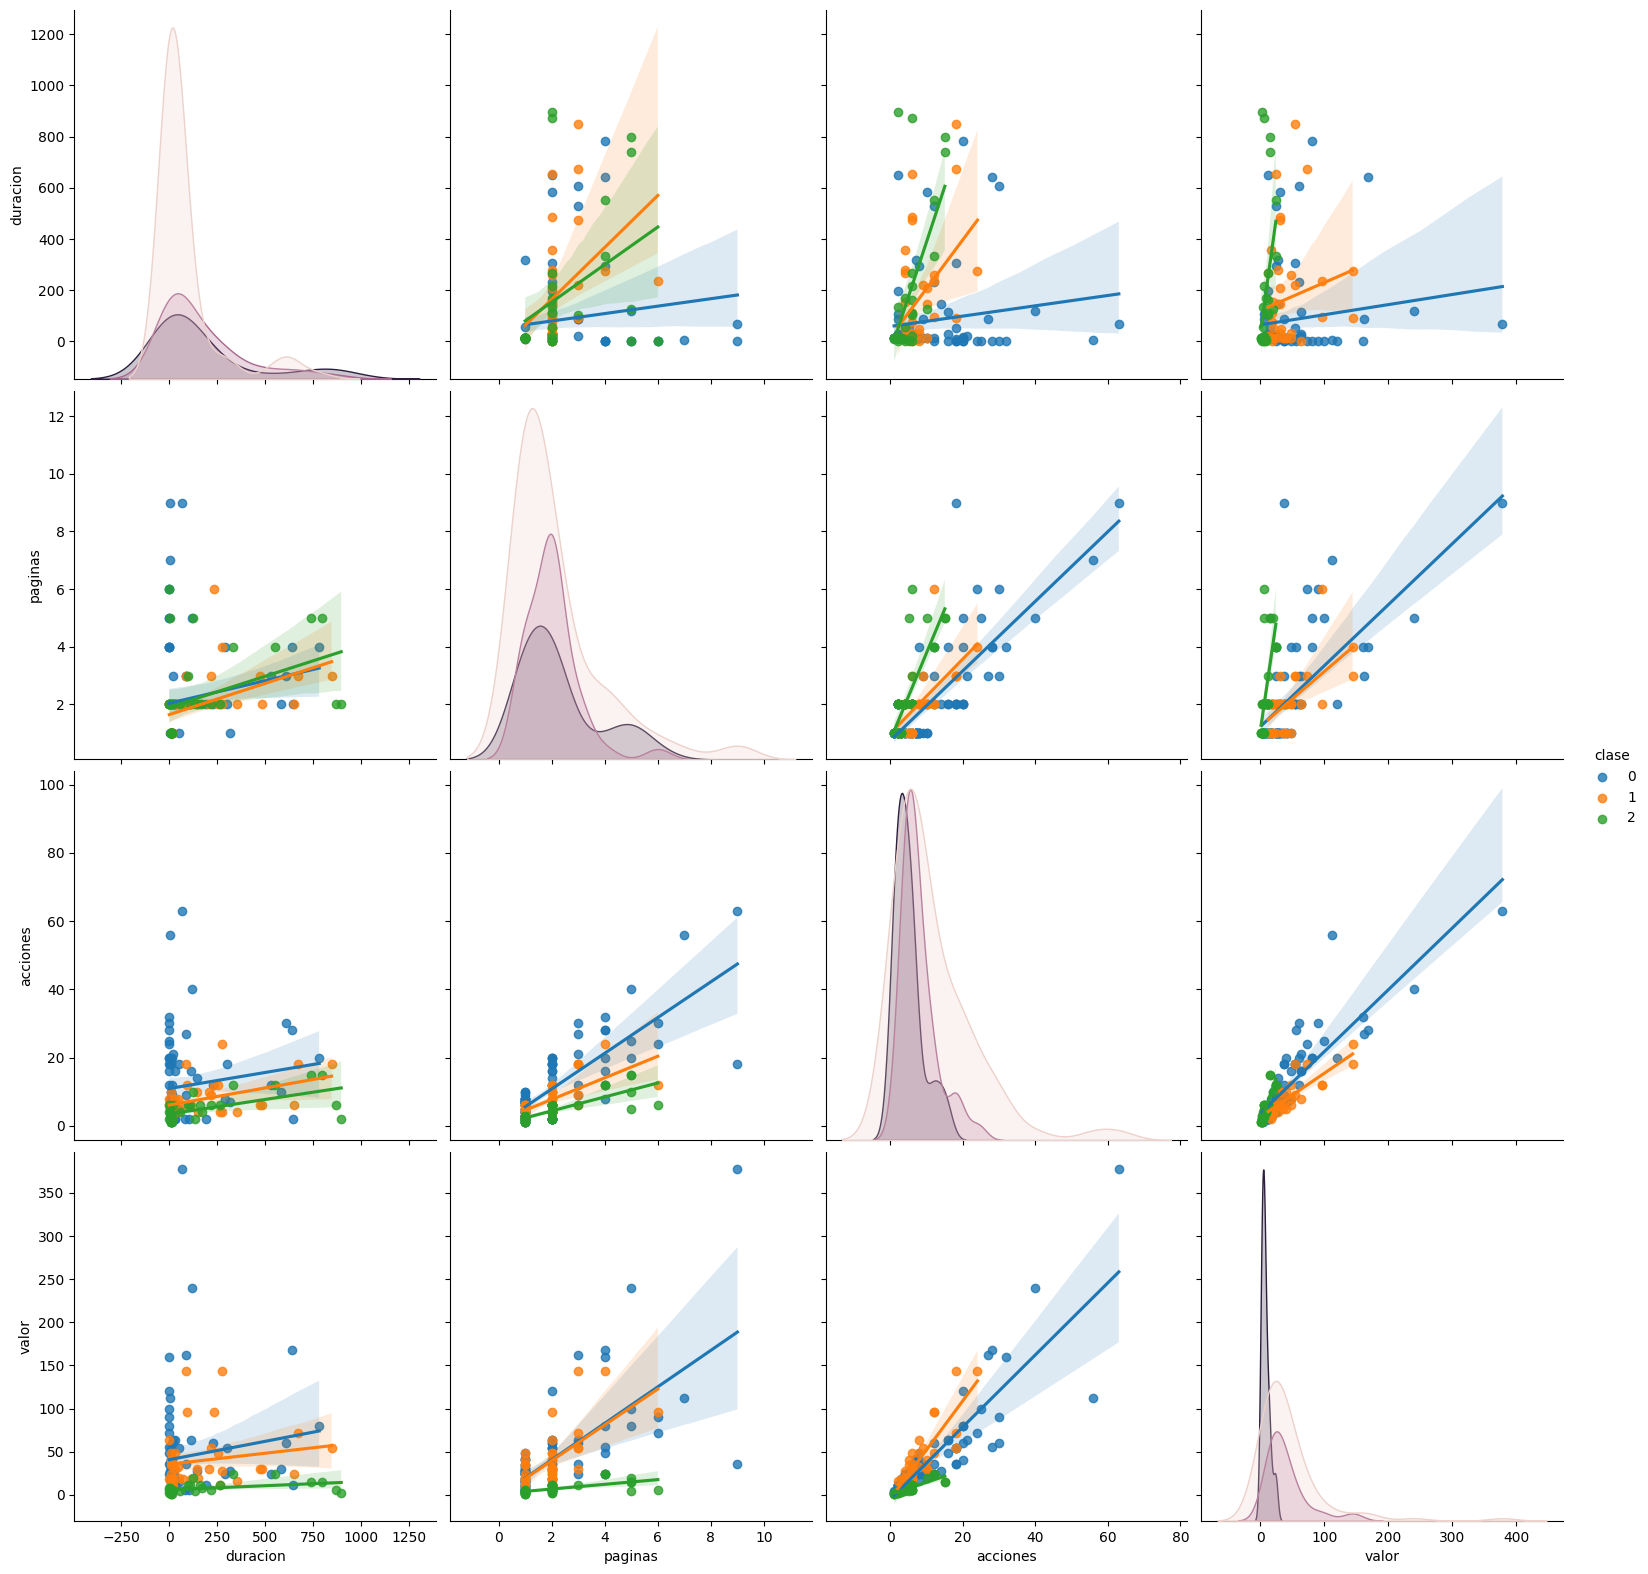

In [7]:
sb.pairplot(df, hue='clase', height=4, vars=["duracion", "paginas", "acciones", "valor"], kind='reg')
plt.show()


In [8]:
X = df.drop("clase", axis=1)
y = df["clase"]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

Entrenamiento: (123, 4), Prueba: (31, 4)


In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# 10. Evaluar modelo
y_pred = model.predict(X_test)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión:", accuracy_score(y_test, y_pred))

# 11. Clasificación de nuevo dato
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
X_new_scaled = scaler.transform(X_new)
prediction = model.predict(X_new_scaled)
print("Predicción para nuevo dato (clase):", prediction)

Matriz de Confusión:
[[13  0  3]
 [ 6  2  1]
 [ 3  0  3]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.59      0.81      0.68        16
           1       1.00      0.22      0.36         9
           2       0.43      0.50      0.46         6

    accuracy                           0.58        31
   macro avg       0.67      0.51      0.50        31
weighted avg       0.68      0.58      0.55        31

Precisión: 0.5806451612903226
Predicción para nuevo dato (clase): 2


c:\Users\Easy Data\Dropbox\PC\Desktop\ITSE\DATA SIENCE\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
